In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import statsmodels.api as sm
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve

In [2]:
data=pd.read_csv('../dataset/hmelq.csv')
df=data.copy() #data kopyalandı
df.dropna(inplace=True)# null veriler silindi
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
bad        2018 non-null int64
loan       2018 non-null int64
mortdue    2018 non-null float64
value      2018 non-null float64
reason     2018 non-null object
job        2018 non-null object
yoj        2018 non-null float64
derog      2018 non-null float64
delinq     2018 non-null float64
clage      2018 non-null float64
ninq       2018 non-null float64
clno       2018 non-null float64
debtinc    2018 non-null float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [3]:
y=df["bad"]
X= df.drop(["reason", "job", "bad"], axis=1).astype("float64")#verileri cıkardık
X.head()

,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
153,18200.0,94727.0,136877.0,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,21700.0,79240.0,96784.0,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,34100.0,241931.0,36486.0,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,8400.0,62989.0,76718.0,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,17400.0,25859.0,43684.0,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [5]:
#stats models ile datamızı eğittik
#istatistiksel test
loj = sm.Logit(y_train,X_train).fit()
loj.summary()

Optimization terminated successfully.
         Current function value: 0.269478
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 1412
Model:                          Logit   Df Residuals:                     1402
Method:                           MLE   Df Model:                            9
Date:                Thu, 26 Sep 2019   Pseudo R-squ.:                  0.1040
Time:                        12:25:25   Log-Likelihood:                -380.50
converged:                       True   LL-Null:                       -424.68
Covariance Type:            nonrobust   LLR p-value:                 3.482e-15
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -3.059e-05   1.24e-05     -2.466      0.014   -5.49e-05   -6.28e-06
mortdue      4.08e-06   5.24e-06      0.778      0.437    -6.2e-06    1.44e-05
value      -2.037e-06    4.3e-06     -0.473      0.636   -1.05e-05     6.4e-06
yoj           -0.0421      0.015     -2.792      0.005      -0.072      -0.013
derog          0.5465      0.149      3.667      0.000       0.254       0.839
delinq         0.8033      0.103      7.814      0.000       0.602       1.005
clage         -0.0076      0.002     -4.908      0.000      -0.011      -0.005
ninq           0.0299      0.053      0.565      0.572      -0.074       0.134
clno          -0.0500      0.013     -3.980      0.000      -0.075      -0.025
debtinc        0.0108      0.008      1.313      0.189      -0.005       0.027
==============================================================================
"""

In [6]:
from sklearn.linear_model import LogisticRegression
loj = LogisticRegression(solver = "liblinear") 
loj_model= loj.fit(X_train,y_train)

In [7]:
y_pred=loj_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9125412541254125

In [8]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       554
           1       0.00      0.00      0.00        52

    accuracy                           0.91       606
   macro avg       0.46      0.50      0.48       606
weighted avg       0.84      0.91      0.87       606



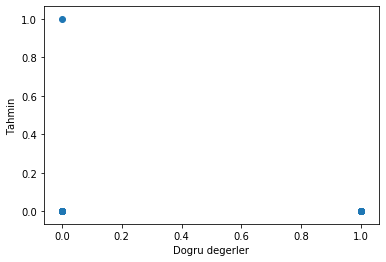

In [9]:
plt.scatter(y_test,y_pred)
plt.xlabel("Dogru degerler")
plt.ylabel("Tahmin")
plt.show()

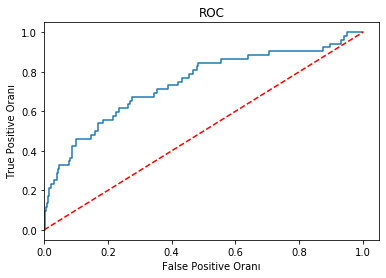

In [10]:
logit_roc_auc = roc_auc_score(y_test, loj_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, loj_model.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()